In [34]:
from PIL import Image, ImageOps
from pathlib import Path
from typing import Optional
from matplotlib import pyplot as plt
import logging

In [35]:
TILE_SIZE = 1650 # in pixels
BORDER_SIZE = 200  # in pixels
BORDER_COLOR = (255, 255, 255)
BACKGROUND_COLOR = (255, 255, 255)
IMAGE_DIR = Path("board")

# Define the layout grid (rows of indices, None for empty)
# fmt: off
layout:list[list[Optional[int]]] = [
    [None, None, 0, None, None],
    [None, None, 1, None, None],
    [None,    5, 2,    4, None],
    [None, None, 3, None, None],
]
# fmt: on



# charuco_410x410_3x3_s133_m105_face3_no_12_DICT_7X7_1000
# xxxxxxx_<phy_size>_<grid_size>_<checker_size>_<marker_space>_face<face_idx>_no_<no_idx>_DICT_<dict_size>
# 0        1          2           3              4              5             6   7             8
def parse_filename_to_face_idx(filename: str):
    parts = filename.split("_")
    return int(parts[5][len("face") :])


image_pathes = list(IMAGE_DIR.glob("*.png"))
image_indice = map(lambda p: parse_filename_to_face_idx(p.stem), image_pathes)
images = {k: v for k, v in zip(image_indice, image_pathes)}
display(images)

{1: PosixPath('board/charuco_410x410_3x3_s133_m105_face1_no_4_DICT_7X7_1000.png'),
 4: PosixPath('board/charuco_410x410_3x3_s133_m105_face4_no_16_DICT_7X7_1000.png'),
 3: PosixPath('board/charuco_410x410_3x3_s133_m105_face3_no_12_DICT_7X7_1000.png'),
 0: PosixPath('board/charuco_410x410_3x3_s133_m105_face0_no_0_DICT_7X7_1000.png'),
 5: PosixPath('board/charuco_410x410_3x3_s133_m105_face5_no_20_DICT_7X7_1000.png'),
 2: PosixPath('board/charuco_410x410_3x3_s133_m105_face2_no_8_DICT_7X7_1000.png')}

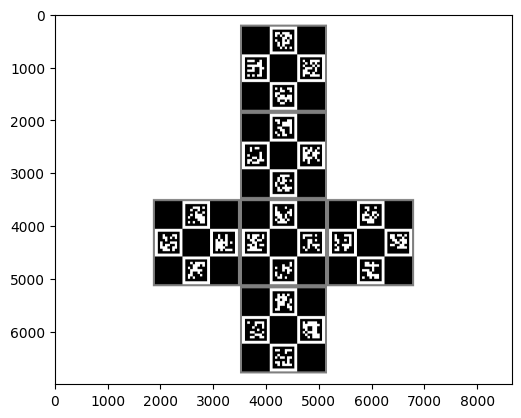

In [36]:
# Create blank canvas
rows = len(layout)
cols = len(layout[0])
canvas = Image.new("RGB", (cols * TILE_SIZE, rows * TILE_SIZE), BACKGROUND_COLOR)

# Paste tiles
for y, row in enumerate(layout):
    for x, idx in enumerate(row):
        if idx is not None:
            path = images.get(idx)
            if path is not None:
                tile = Image.open(path)
                # for the face index 4, rotate the tile 180 degrees
                if idx == 4:
                    tile = tile.rotate(180)
                canvas.paste(tile, (x * TILE_SIZE, y * TILE_SIZE))
            else:
                logging.warning(f"Missing: {idx}")
canvas_with_border = ImageOps.expand(canvas, border=BORDER_SIZE, fill=BORDER_COLOR)

plt.imshow(canvas_with_border)
plt.show()

In [37]:
canvas_with_border.save("merged_uv_layout.png")